In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.6, random_state=0)

In [9]:
x.shape

(1000, 2)

C:\Users\ratan\AppData\Local\Temp\ipykernel_13968\1643460674.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1], s=50, cmap='viridis')


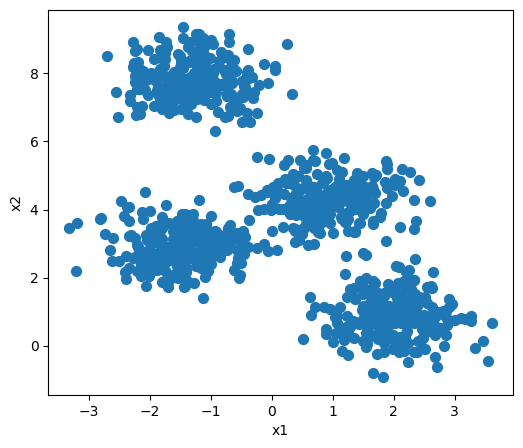

In [14]:
# plot scatter graph
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], s=50, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

C:\Users\ratan\AppData\Local\Temp\ipykernel_13968\4019124490.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train[:, 0], x_train[:, 1], s=50, cmap='viridis')


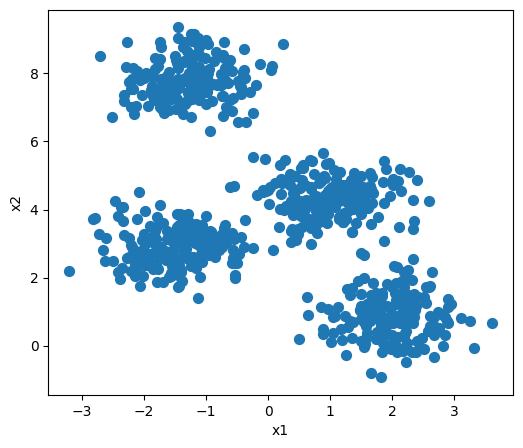

In [16]:
plt.figure(figsize=(6, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], s=50, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init = 'k-means++')

In [18]:
y_labels_train = kmeans.fit_predict(x_train)

C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# get the cluster centers and the cluster labels
print(kmeans.cluster_centers_)
# print(kmeans.labels_)

[[-1.25797694  7.84190232]
 [ 1.99885371  0.86900297]
 [ 0.97487309  4.32971335]
 [-1.49260415  2.9043594 ]]


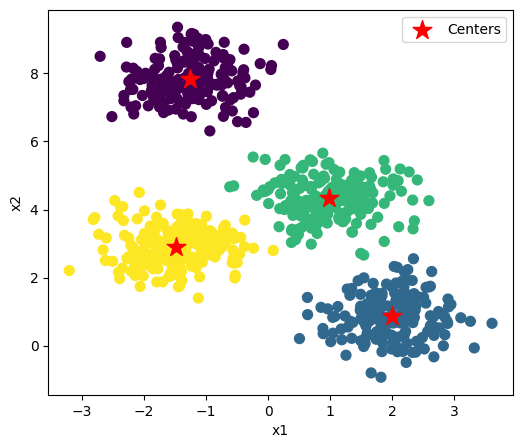

In [21]:
plt.figure(figsize=(6, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_labels_train, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centers')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [22]:
# shilouette score
from sklearn.metrics import silhouette_score
print(silhouette_score(x_train, kmeans.labels_))

0.6804239188786518


In [23]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ratan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

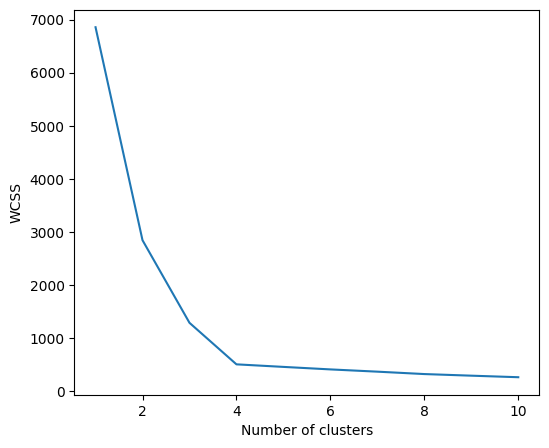

In [24]:
# elbow graph
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
%pip install kneed

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ratan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [26]:
# kneed graph
from kneed import KneeLocator
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print(kn.knee)

4
